## Context

ABC Supermarket is planning for the year-end sale - they want to launch a new offer i.e. gold membership for only \\$499 that is of \\$999 on normal days (that gives 20% discount on all purchases) only for existing customers, for that they need to do a campaign through phone calls - the best way to reduce the cost of the campaign is to make a predictive model to classify customers who might purchase the offer, using the data they gathered during last year's campaign.

We will build a model for classifying whether customers will reply with a positive
response or not.

## Import Statements

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [64]:
df = pd.read_excel("marketing_data.xlsx")

In [65]:
df.shape

(2240, 22)

## Column Definitions
- Response (target) - 1 if customer accepted the offer in the last campaign, 0
otherwise
- Complain - 1 if a customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase
- ID - unique customer-id
- Year_Birth - customer's year of birth

## Data Profiling

In [66]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [67]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [68]:
df['Income'] = df['Income'].fillna(0)

## Data Cleaning and Transformation

In [69]:
from datetime import datetime
quantified_year = df
quantified_year["Year_Birth"] = pd.to_datetime(quantified_year["Year_Birth"], format = "%Y") # convert the number to datetime object
year = datetime.now().year # the assumed threshold is 2024
quantified_year["Age"] = year - quantified_year['Year_Birth'].dt.year
quantified_year

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970-01-01,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,189,218,1,4,4,6,1,1,0,54
1,1,1961-01-01,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,37,1,7,3,7,5,1,0,63
2,10476,1958-01-01,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,30,1,3,2,5,2,0,0,66
3,1386,1967-01-01,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,1,1,0,2,7,0,0,57
4,5371,1989-01-01,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,0,34,2,3,1,2,7,1,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976-01-01,PhD,Divorced,66476.0,0,1,2013-07-03 00:00:00,99,372,...,48,78,2,5,2,11,4,0,0,48
2236,5263,1977-01-01,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,8,16,1,1,0,3,8,0,0,47
2237,22,1976-01-01,Graduation,Divorced,46310.0,1,0,2012-03-12 00:00:00,99,185,...,5,14,2,6,1,5,8,0,0,48
2238,528,1978-01-01,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,165,63,1,5,4,10,3,0,0,46


In [70]:
# Check the validity of Year_Birth and Dt_Customer and also check whether or not they are 18 years old.
def check_year_birth_before_dt_customer(df):
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], infer_datetime_format=True, errors='coerce')
    df = df.dropna(subset=['Dt_Customer'])
    df['Year_Birth'] = df['Year_Birth'].astype(str).str.extract('(\d+)')
    df['Year_Birth'] = pd.to_numeric(df['Year_Birth'], errors='coerce')
    
    df['Age_At_Registration'] = df['Dt_Customer'].dt.year - df['Year_Birth']
    filtered_df = df[(df['Year_Birth'] <= df['Dt_Customer'].dt.year) & (df['Age_At_Registration'] >= 18)]
    return filtered_df


validated_dt_customer = check_year_birth_before_dt_customer(quantified_year)
validated_dt_customer.dropna()
validated_dt_customer

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_48604\3828262272.py:5: SyntaxWarning: invalid escape sequence '\d'
  df['Year_Birth'] = df['Year_Birth'].astype(str).str.extract('(\d+)')
C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_48604\3828262272.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], infer_datetime_format=True, errors='coerce')
C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_48604\3828262272.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Age_At_Registration
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,54,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,63,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,66,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,1,1,0,2,7,0,0,57,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,34,2,3,1,2,7,1,0,35,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,78,2,5,2,11,4,0,0,48,37
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,16,1,1,0,3,8,0,0,47,36
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,14,2,6,1,5,8,0,0,48,36
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,63,1,5,4,10,3,0,0,46,34


In [71]:
removed_date_validators = validated_dt_customer.drop(columns=['Year_Birth', 'Age_At_Registration'])
removed_date_validators

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,189,218,1,4,4,6,1,1,0,54
1,1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,0,37,1,7,3,7,5,1,0,63
2,10476,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,2,30,1,3,2,5,2,0,0,66
3,1386,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,...,0,0,1,1,0,2,7,0,0,57
4,5371,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,...,0,34,2,3,1,2,7,1,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,18,...,48,78,2,5,2,11,4,0,0,48
2236,5263,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,...,8,16,1,1,0,3,8,0,0,47
2237,22,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,2,...,5,14,2,6,1,5,8,0,0,48
2238,528,Graduation,Married,65819.0,0,0,2012-11-29,99,267,38,...,165,63,1,5,4,10,3,0,0,46


In [72]:
def quantify_dt_customer(df):
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
    df['Year Of Enrollment'] = df['Dt_Customer'].dt.year
    df['Month Of Enrollment'] = df['Dt_Customer'].dt.month
    df['Day Of Enrollment'] = df['Dt_Customer'].dt.day
    return df

quantify_dt_customer(removed_date_validators)
quantified_dt_customer = removed_date_validators.drop(columns='Dt_Customer')
quantified_dt_customer

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Year Of Enrollment,Month Of Enrollment,Day Of Enrollment
0,1826,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,4,4,6,1,1,0,54,2014,6,16
1,1,Graduation,Single,57091.0,0,0,0,464,5,64,...,7,3,7,5,1,0,63,2014,6,15
2,10476,Graduation,Married,67267.0,0,1,0,134,11,59,...,3,2,5,2,0,0,66,2014,5,13
3,1386,Graduation,Together,32474.0,1,1,0,10,0,1,...,1,0,2,7,0,0,57,2014,11,5
4,5371,Graduation,Single,21474.0,1,0,0,6,16,24,...,3,1,2,7,1,0,35,2014,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,PhD,Divorced,66476.0,0,1,99,372,18,126,...,5,2,11,4,0,0,48,2013,7,3
2236,5263,2n Cycle,Married,31056.0,1,0,99,5,10,13,...,1,0,3,8,0,0,47,2013,1,22
2237,22,Graduation,Divorced,46310.0,1,0,99,185,2,88,...,6,1,5,8,0,0,48,2012,3,12
2238,528,Graduation,Married,65819.0,0,0,99,267,38,701,...,5,4,10,3,0,0,46,2012,11,29


## Initial Exploratory Data Analysis

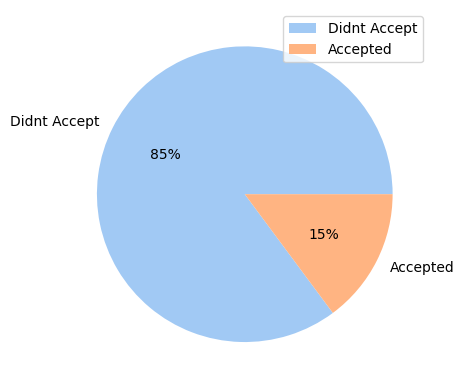

In [73]:
colors = sns.color_palette('pastel')[0:len(df['Response'].value_counts())]

#create pie chart
plt.pie(quantified_dt_customer['Response'].value_counts(), labels=['Didnt Accept', 'Accepted'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

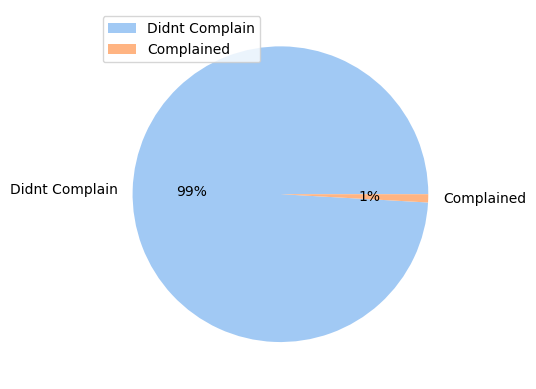

In [74]:
colors = sns.color_palette('pastel')[0:len(df['Complain'].value_counts())]

#create pie chart
plt.pie(quantified_dt_customer['Complain'].value_counts(), labels=['Didnt Complain', 'Complained'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

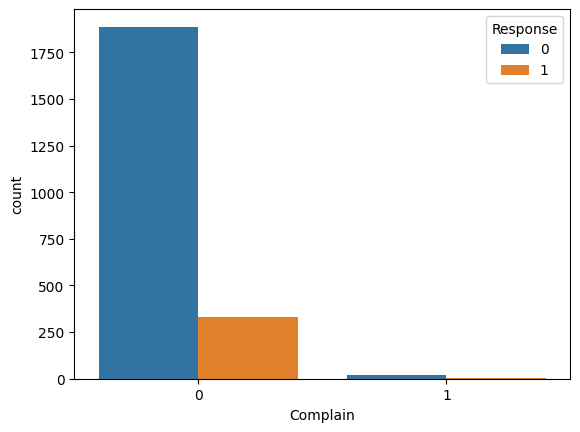

In [75]:
sns.barplot(x = 'Complain', y='count', hue = 'Response',data=quantified_dt_customer[['Complain', 'Response']].value_counts().reset_index())
    
plt.show()

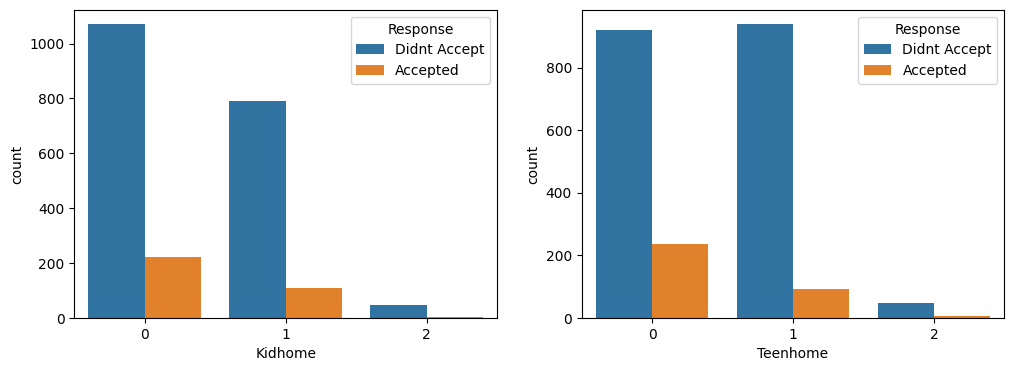

In [76]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

for i, ax, col in zip(range(2), axes.flat, ['Kidhome', 'Teenhome']):
    tmp = quantified_dt_customer[[col, 'Response']].value_counts().to_frame().reset_index()
    tmp['Response'] = tmp['Response'].replace({0: 'Didnt Accept', 1: 'Accepted'})

    sns.barplot(x = col, y='count', 
                   hue = 'Response',data=tmp, ax=ax)
    
plt.show()

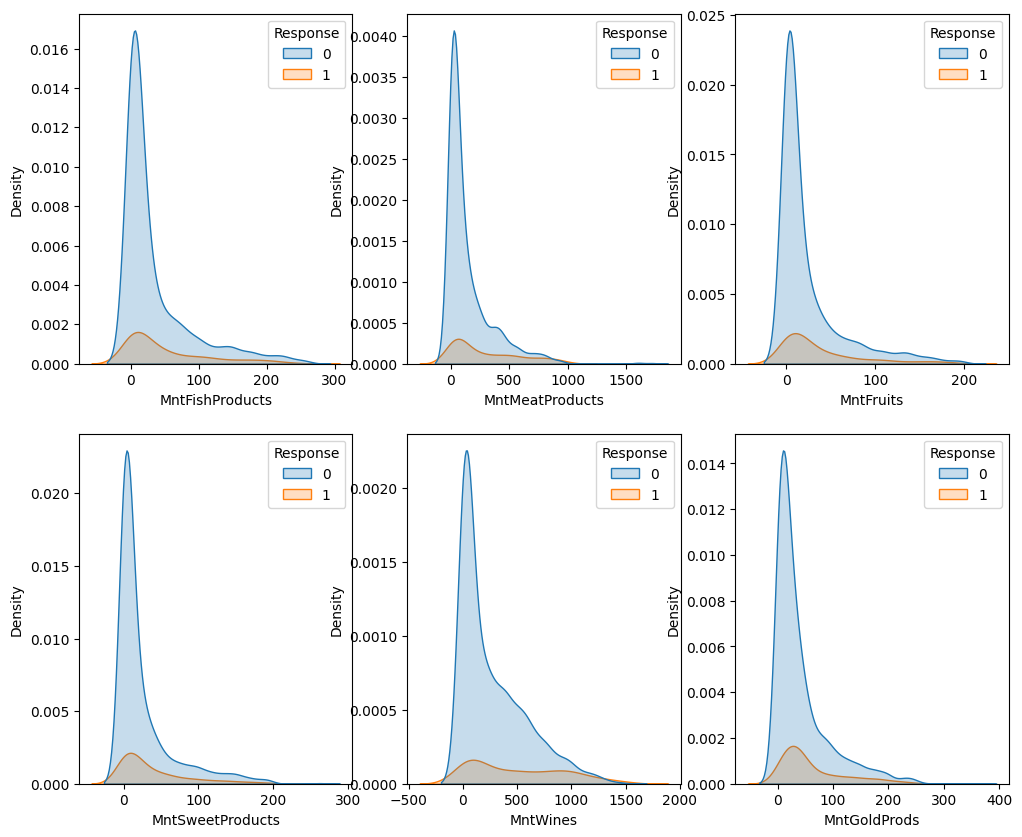

In [77]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 10))

for i, ax, col in zip(range(6), axes.flat, ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']):
    sns.kdeplot(df, x=col, hue='Response', fill=True, ax=ax)
    
plt.show()

## Customer Demographic

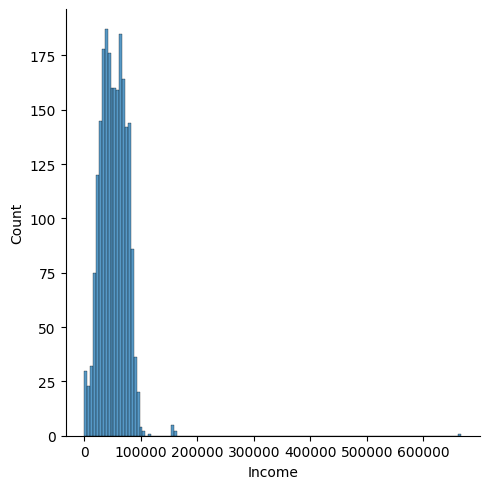

In [90]:
sns.displot(quantified_dt_customer['Income']) # possible outliers

In [91]:
quantified_dt_customer['Income'].describe()

count      2237.000000
mean      51680.167635
std       25593.457517
min           0.000000
25%       34728.000000
50%       51039.000000
75%       68274.000000
max      666666.000000
Name: Income, dtype: float64

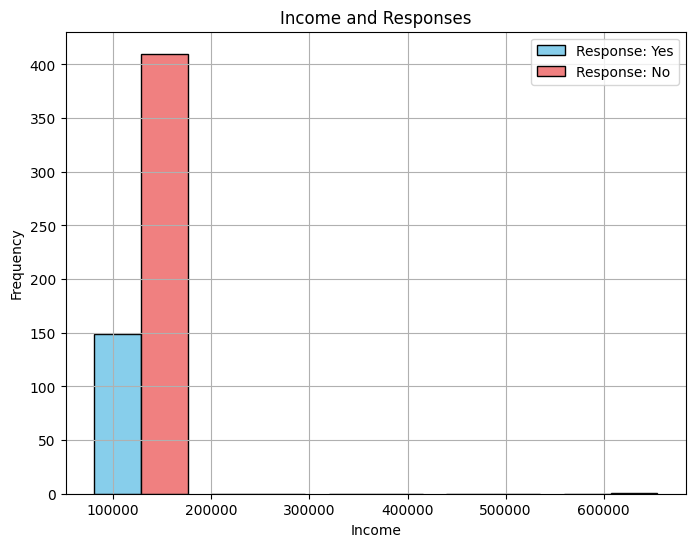

In [100]:
def income_viewing_from_responses (df, threshold):
    df = df[(df['Income'] >= threshold)]
    response_yes = df[df['Response'] == 1]
    response_no = df[df['Response'] == 0]
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.hist([response_yes['Income'], response_no['Income']], bins=5, color=['skyblue', 'lightcoral'], edgecolor='black', label=['Response: Yes', 'Response: No'])
    plt.title('Income and Responses')
    plt.xlabel('Income')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()
income_viewing_from_responses(quantified_dt_customer, 68274)

In [99]:
## To normalize data, Income will be filtered to remove all customer with 0 income, and the 
def normalize_income (df):
    ninetyfive_percentile = df['Income'].quantile(0.95)
    print("The 95% threshold is: ", ninetyfive_percentile)
    filtered_data = df[(df['Income'] != 0) & (df['Income'] <= ninetyfive_percentile)]
    return filtered_data

normalized_income = normalize_income(quantified_dt_customer)
normalized_income

The 90% threshold is:  83956.99999999997


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Year Of Enrollment,Month Of Enrollment,Day Of Enrollment
1,1,Graduation,Single,57091.0,0,0,0,464,5,64,...,7,3,7,5,1,0,63,2014,6,15
2,10476,Graduation,Married,67267.0,0,1,0,134,11,59,...,3,2,5,2,0,0,66,2014,5,13
3,1386,Graduation,Together,32474.0,1,1,0,10,0,1,...,1,0,2,7,0,0,57,2014,11,5
4,5371,Graduation,Single,21474.0,1,0,0,6,16,24,...,3,1,2,7,1,0,35,2014,8,4
5,7348,PhD,Single,71691.0,0,0,0,336,130,411,...,4,7,5,2,1,0,66,2014,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,9977,Graduation,Divorced,78901.0,0,1,99,321,11,309,...,9,3,5,4,0,0,51,2013,9,17
2235,10142,PhD,Divorced,66476.0,0,1,99,372,18,126,...,5,2,11,4,0,0,48,2013,7,3
2236,5263,2n Cycle,Married,31056.0,1,0,99,5,10,13,...,1,0,3,8,0,0,47,2013,1,22
2237,22,Graduation,Divorced,46310.0,1,0,99,185,2,88,...,6,1,5,8,0,0,48,2012,3,12


In [101]:
normalized_income['Income'].describe() # more reasonable prices. More importantly, scales the income to the discount promo of 499 or 999

count     2101.000000
mean     49734.138505
std      19284.093806
min       1730.000000
25%      34529.000000
50%      49678.000000
75%      65735.000000
max      83917.000000
Name: Income, dtype: float64

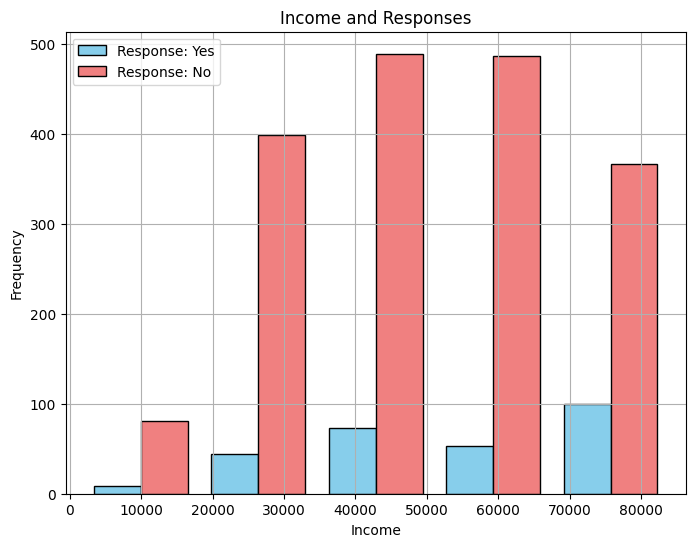

In [102]:
income_viewing_from_responses(normalized_income, 0) # still good sample size

In [103]:
normalized_income.to_excel('model_data.xlsx', index=False)

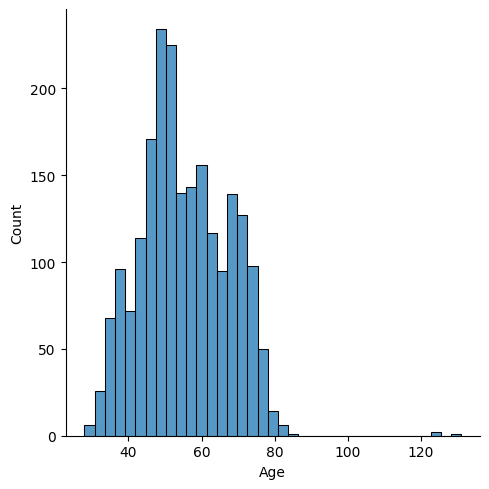

In [104]:
sns.displot(normalized_income['Age']) 

In [105]:
normalized_income['Age'].describe() ## There is someone who is 131 y/o. 

count    2101.000000
mean       55.322228
std        11.862403
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64

In [109]:
## Same gist as before. Since we already filtered out underage customers, we now filter out the 95% of customers in terms of age.
def normalize_age (df):
    ninetyfive_percentile = df['Age'].quantile(0.95)
    print("The 95% threshold is: ", ninetyfive_percentile)
    filtered_data = df[(df['Age'] != 0) & (df['Age'] <= ninetyfive_percentile)]
    return filtered_data

normalized_age = normalize_age(normalized_income)
normalized_age

The 95% threshold is:  74.0


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Year Of Enrollment,Month Of Enrollment,Day Of Enrollment
1,1,Graduation,Single,57091.0,0,0,0,464,5,64,...,7,3,7,5,1,0,63,2014,6,15
2,10476,Graduation,Married,67267.0,0,1,0,134,11,59,...,3,2,5,2,0,0,66,2014,5,13
3,1386,Graduation,Together,32474.0,1,1,0,10,0,1,...,1,0,2,7,0,0,57,2014,11,5
4,5371,Graduation,Single,21474.0,1,0,0,6,16,24,...,3,1,2,7,1,0,35,2014,8,4
5,7348,PhD,Single,71691.0,0,0,0,336,130,411,...,4,7,5,2,1,0,66,2014,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,9977,Graduation,Divorced,78901.0,0,1,99,321,11,309,...,9,3,5,4,0,0,51,2013,9,17
2235,10142,PhD,Divorced,66476.0,0,1,99,372,18,126,...,5,2,11,4,0,0,48,2013,7,3
2236,5263,2n Cycle,Married,31056.0,1,0,99,5,10,13,...,1,0,3,8,0,0,47,2013,1,22
2237,22,Graduation,Divorced,46310.0,1,0,99,185,2,88,...,6,1,5,8,0,0,48,2012,3,12


## Baseline Modelling

In [78]:
quantified_dt_customer.dtypes

ID                       int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
Age                      int32
Year Of Enrollment       int32
Month Of Enrollment      int32
Day Of Enrollment        int32
dtype: object

In [80]:
X = quantified_dt_customer.drop('Response', axis=1).iloc[:,1:][['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Age', 'Year Of Enrollment', 'Month Of Enrollment', 'Day Of Enrollment']]
y = quantified_dt_customer['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [81]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [82]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
preds = clf.predict(scaler.transform(X_test))

In [83]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)

In [84]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.8646
Precision: 0.5652
Recall: 0.3900
F1: 0.4615
AUC: 0.6688
